# 1.预测人口
### 代码：

采用y=ax+b预测2020年人口为14.501071424194947
y=ax+b拟合的残差平方和为0.529672619047618
采用y=ae^(bx)预测2020年人口为14.63061225732936
y=ae^(bx)拟合的残差平方和为0.7699358608234159


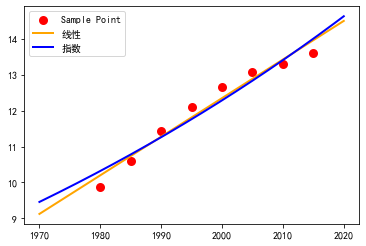

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
from scipy.optimize import leastsq

Xi=np.array([1980,1985,1990,1995,2000,2005,2010,2015])
Yi=np.array([9.87,10.59,11.43,12.11,12.67,13.08,13.30,13.60])
def error1(p,x,y):
    return p[0]*x+p[1]-y
def error2(p,x,y):
    return p[0]*np.exp(p[1]*x)-y
p=[1,1]
ret1=leastsq(error1,p,args=(Xi,Yi))
a1,b1=ret1[0]
p=[0.001,0.001]
ret2=leastsq(error2,p,args=(Xi,Yi))
a2,b2=ret2[0]
# 定义求解列表的平方和函数sum_of_squares用来计算拟合的残差平方和
sum_of_squares = lambda L : sum(map(lambda iGotThisFromStackOverflow:iGotThisFromStackOverflow**2, L))
print("采用y=ax+b预测2020年人口为{}".format(error1(ret1[0],2020,0)))
print("y=ax+b拟合的残差平方和为{}".format(sum_of_squares(error1(ret1[0],Xi,Yi))))
print("采用y=ae^(bx)预测2020年人口为{}".format(error2(ret2[0],2020,0)))
print("y=ae^(bx)拟合的残差平方和为{}".format(sum_of_squares(error2(ret2[0],Xi,Yi))))
#绘图
plt.figure()
plt.scatter(Xi,Yi,color='red',label="Sample Point",linewidth=3)
x=np.linspace(1970,2020,5000)
y1=a1*x+b1
y2=a2*np.exp(b2*x)
plt.plot(x,y1,color="orange",label="线性",linewidth=2)
plt.plot(x,y2,color="blue",label="指数",linewidth=2)
plt.legend()
plt.show()

(1)采用y=ax+b预测2020年人口为14.501071424194947;采用y=ae^(bx)预测2020年人口为14.63061225732936  
(2)y=ax+b拟合效果更好。

# 2.函数逼近中的病态问题
### 代码：

In [2]:
from numpy.linalg import cond
import numpy as np
global m
m=6 
X=np.linspace(0,1,m) #将区间[0,1]等分为m个节点
#print(X)
def CreateHT(n):
    a=np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            for k in range(m):
                a[i][j]=a[i][j]+X[k]**(i+j)
    return a
H1=CreateHT(4)
print("3次多项式拟合时法方程系数条件数为")
#print(H1)
print(cond(H1))
H2=CreateHT(6)
print("5次多项式拟合时法方程系数条件数为")
#print(H2)
print(cond(H2))
H3=CreateHT(11)
print("10次多项式拟合时法方程系数条件数为")
#print(H3)
print(cond(H3))
H4=CreateHT(16)
print("15次多项式拟合时法方程系数条件数为")
#print(H4)
print(cond(H4))

3次多项式拟合时法方程系数条件数为
8437.029369241052
5次多项式拟合时法方程系数条件数为
24249430.305968083
10次多项式拟合时法方程系数条件数为
9.521529550343771e+17
15次多项式拟合时法方程系数条件数为
1.7171590361107218e+18


# 3.插值与函数逼近的比较
### 代码：

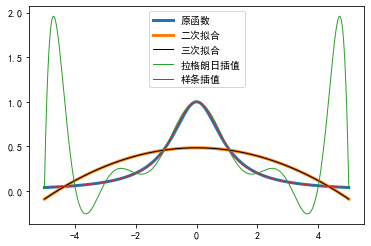

In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号
from scipy.interpolate import CubicSpline
from scipy.interpolate import lagrange

Xi=np.linspace(-5,5,11)
Yi=1/(1+Xi**2)
#二次拟合多项式
z1=np.polyfit(Xi,Yi,2)
p1=np.poly1d(z1)
#三次拟合多项式
z2=np.polyfit(Xi,Yi,3)
p2=np.poly1d(z2)
#样条插值
cs=CubicSpline(Xi,Yi,bc_type='not-a-knot')
#拉格朗日插值
L=lagrange(Xi,Yi)
#绘图
plt.figure()
x=np.linspace(-5,5,1001)
plt.plot(x,1/(1+x**2),label="原函数",linewidth=3)
plt.plot(x,p1(x),label="二次拟合",linewidth=3)
plt.plot(x,p2(x),color="black",label="三次拟合",linewidth=1)
plt.plot(x,L(x),label="拉格朗日插值",linewidth=1)
plt.plot(x,cs(x),label="样条插值",linewidth=1)
plt.legend()
plt.show()

(1)通过图像直观显示，对于龙格函数，采用二次拟合三次拟合效果很差，拉格朗日插值在|x|很大的时候误差很大，样条插值逼近效果最优